### Kartik Gupta
### Bharat Intern
### Predict the different species of flowers on the length of there petals and sepals

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [31]:
# import data
iris_data = pd.read_csv('iris.csv')

In [32]:
# peek at data
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
# drop column 'id'
iris_data = iris_data.drop(['Id'], axis=1)
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [34]:
# check dimension
print("the dimension:", iris_data.shape)

the dimension: (150, 5)


In [35]:
# summary of the dataset
print(iris_data.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [36]:
# distribution of classes
print(iris_data.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Text(0, 0.5, 'count')

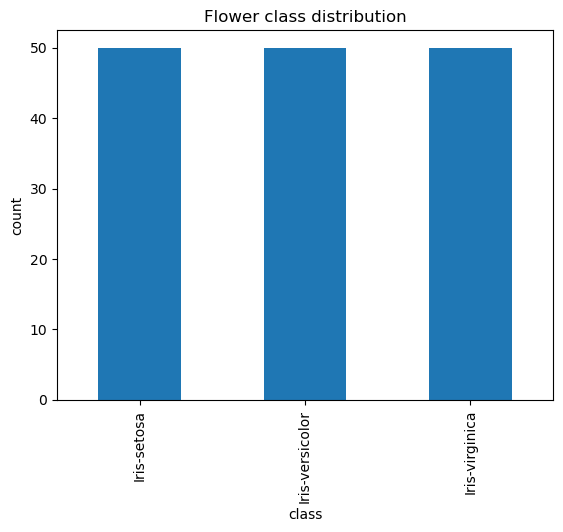

In [37]:
# visualising the distribution
iplot = iris_data['Species'].value_counts().plot.bar(title='Flower class distribution')
iplot.set_xlabel('class',size=10)
iplot.set_ylabel('count',size=10)

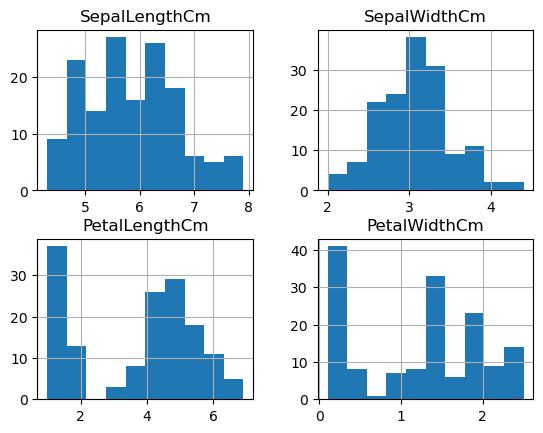

In [38]:
# plot histogram
iris_data.hist()
plt.show()

In [61]:
# split into training and testing data
x = iris_data.drop(['Species'], axis=1)
y = iris_data['Species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [62]:
# importing multiple classification models to compare
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [63]:
# models
models = []

# linear models
models.append(('LR', LogisticRegression(solver='liblinear', multi_class="auto")))
models.append(('LDA', LinearDiscriminantAnalysis()))

# nonlinear models
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma="auto")))

In [64]:
# evaluate each model in turn
print("Model Accuracy:")
names = []
accuracy = []
for name, model in models:
    # 10 fold cross validation to evalue model
    kfold = KFold(n_splits=10 , random_state=6, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    
    # display the cross validation results of the current model
    names.append(name)
    accuracy.append(cv_results)
    msg = "%s: accuracy=%f std=(%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Model Accuracy:
LR: accuracy=0.958333 std=(0.067185)
LDA: accuracy=0.983333 std=(0.033333)
CART: accuracy=0.983333 std=(0.033333)
KNN: accuracy=0.983333 std=(0.033333)
GNB: accuracy=0.983333 std=(0.033333)
SVC: accuracy=0.983333 std=(0.033333)


In [65]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [66]:
# Test the KNN, GNB, and SVC models with test data
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma="auto")))

In [67]:
# reusable function to test our model
def test_model(model):
    model.fit(x_train, y_train) 
    predictions = model.predict(x_test)
    
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))

In [68]:
for name, model in models:
    print("_______________________________________________________________")
    print("Testing", name)
    test_model(model)

_______________________________________________________________
Testing KNN
Accuracy: 0.9
Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

_______________________________________________________________
Testing GNB
Accuracy: 0.8333333333333334
Confusion Matrix:
[[7 0 0]
 [0 9 3]
 [0 2 9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

       accuracy           

### SVC gets the highest accuracy of 0.93